In [1]:
# summarize_sweep.py
import wandb
import pandas as pd


In [2]:

# 1) Point to your sweep
ENTITY  = "test_12342"
PROJECT = "ongsanet-training"
SWEEP_ID = "1herse69"  

api   = wandb.Api()
sweep = api.sweep(f"{ENTITY}/{PROJECT}/{SWEEP_ID}")


In [3]:
sweep.runs

<Runs test_12342/ongsanet-training>

In [4]:
records = []
for run in sweep.runs:
    # read config & final metric
    cfg = run.config
    summary = run.summary
    records.append({
        "kernel_size":      cfg.get("kernel_size"),
        "dilation_depth":   cfg.get("dilation_depth"),
        "num_repeat": cfg.get("num_repeat"),
        "num_channels": cfg.get("num_channels"),
        "val_loss":        summary.get("val_loss"),
        "steps":           summary.get("global_step"),  # or summary["_step"]
        "duration_sec":    summary.get("epoch_time_s") * summary.get("epoch") if summary.get("epoch_time_s") else None
    })

    print(cfg)

df = pd.DataFrame(records)

{'cpu': False, 'gpus': 2, 'model': 'models/VOXac30_custom2/VOXac30_custom2.ckpt', 'resume': False, 'devices': 1, 'in_file': 'Dataset/AD_DA_converter.wav', 'out_file': 'Dataset/VOXac30_custom.wav', 'normalize': True, 'tpu_cores': None, 'batch_size': 128, 'max_epochs': 800, 'num_repeat': 4, 'kernel_size': 9, 'sample_time': 0.1, 'cfg_template': 'configs/phase2_base.yaml', 'num_channels': 30, 'learning_rate': 0.005, 'dilation_depth': 12}
{'cpu': False, 'gpus': 2, 'model': 'models/VOXac30_custom2/VOXac30_custom2.ckpt', 'resume': False, 'devices': 1, 'in_file': 'Dataset/AD_DA_converter.wav', 'out_file': 'Dataset/VOXac30_custom.wav', 'normalize': True, 'tpu_cores': None, 'batch_size': 128, 'max_epochs': 800, 'num_repeat': 3, 'kernel_size': 9, 'sample_time': 0.1, 'cfg_template': 'configs/phase2_base.yaml', 'num_channels': 30, 'learning_rate': 0.005, 'dilation_depth': 12}
{'cpu': False, 'gpus': 2, 'model': 'models/VOXac30_custom2/VOXac30_custom2.ckpt', 'resume': False, 'devices': 1, 'in_file': 

In [7]:
df

,kernel_size,dilation_depth,num_repeat,num_channels,val_loss,steps,duration_sec
0,9,12,4,30,606.225647,None,38.769703
1,9,12,3,30,25.176506,None,64.091699
2,9,12,2,30,1.886063,None,65.313279
3,9,12,1,30,0.879894,None,41.493533
4,9,12,4,24,5.436187,None,40.660997
...,...,...,...,...,...,...,...
595,1,7,1,12,1.094568,None,236.140726
596,1,7,4,6,1.097349,None,13.260344
597,1,7,3,6,1.096640,None,367.381918
598,1,7,2,6,1.093856,None,268.948215


In [34]:
df.to_excel('result.xlsx', index=False)


In [33]:
df_filter = (df[df['num_channels'] < 32
         ].sort_values(by='val_loss'))


# Show all rows without truncation
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_filter)

     kernel_size  dilation_depth  num_repeat  num_channels    val_loss steps  \
124            7              11           4            24    0.166328  None   
312            9               9           4            12    0.166405  None   
26             7              12           2            24    0.166610  None   
314            9               9           2            12    0.166663  None   
250            5              10           2            18    0.166899  None   
326            7               9           2            24    0.166943  None   
209            9              10           3            18    0.166947  None   
253            5              10           3            12    0.166978  None   
332            7               9           4            12    0.167079  None   
232            7              10           4            12    0.167275  None   
350            5               9           2            18    0.167314  None   
234            7              10        

In [ ]:
df[df[dia]]['val_loss']

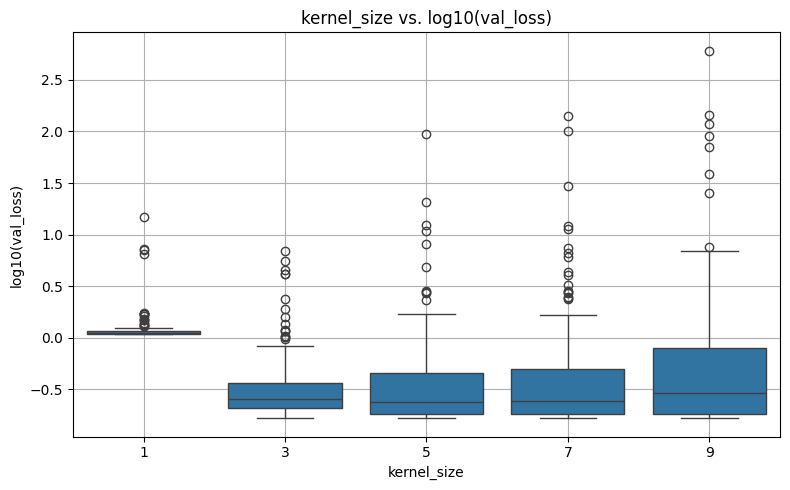

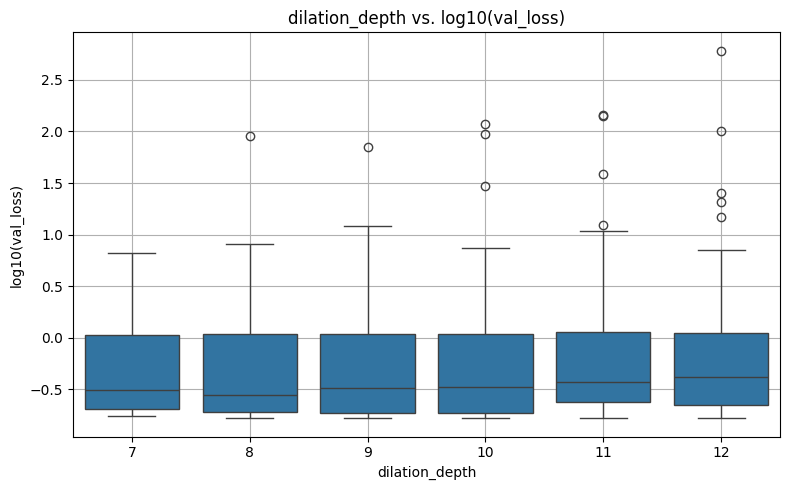

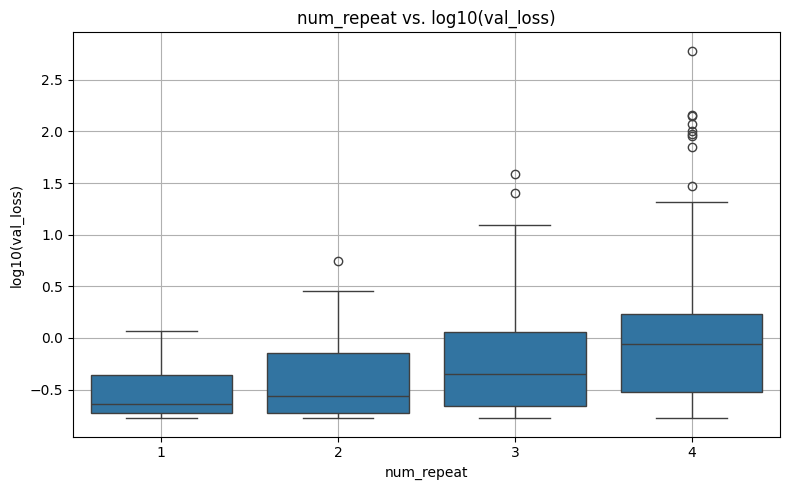

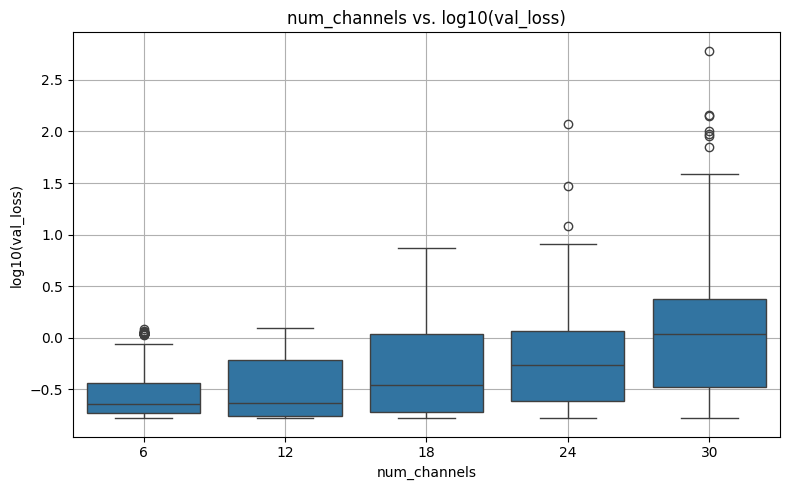

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots of val_loss by each hyperparameter
params = ['kernel_size', 'dilation_depth', 'num_repeat', 'num_channels']
for p in params:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df[p], y=np.log10(df['val_loss']))
    plt.title(f'{p} vs. log10(val_loss)')
    plt.xlabel(p)
    plt.ylabel('log10(val_loss)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


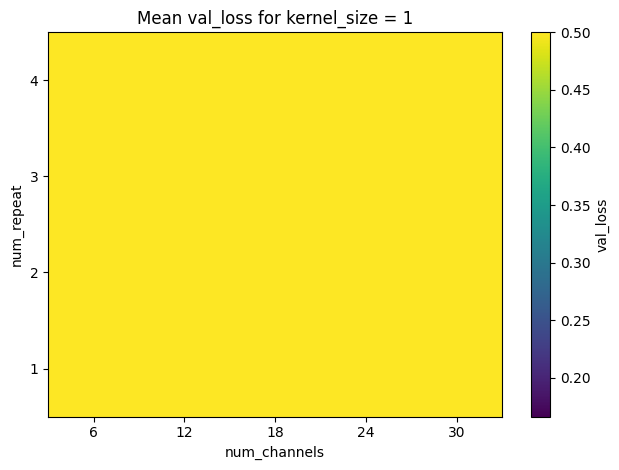

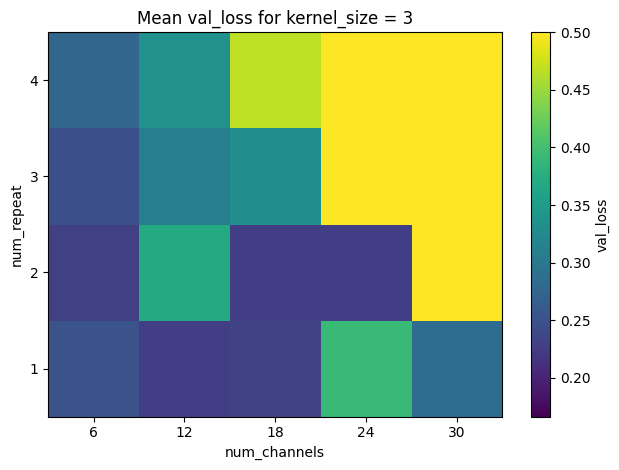

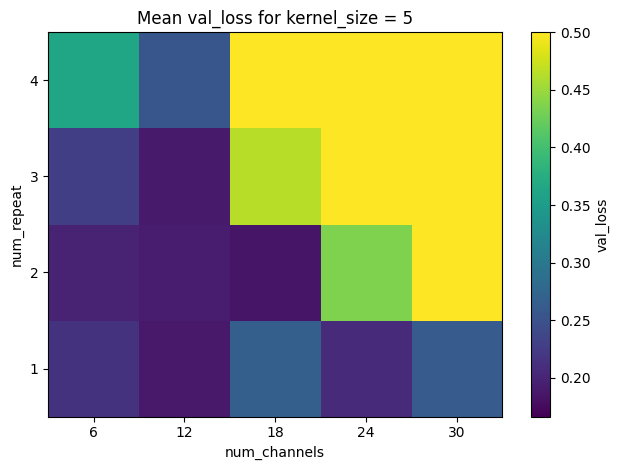

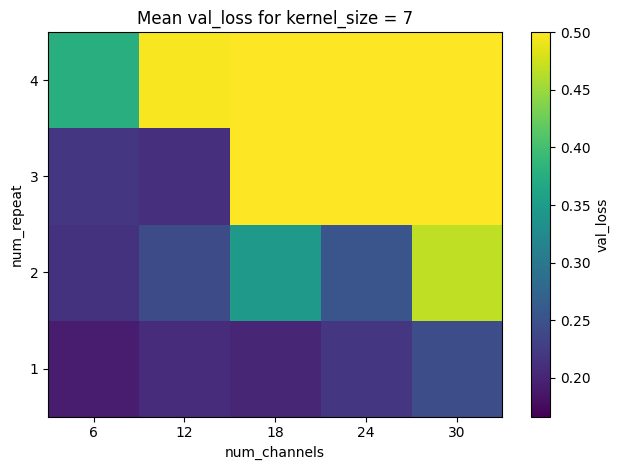

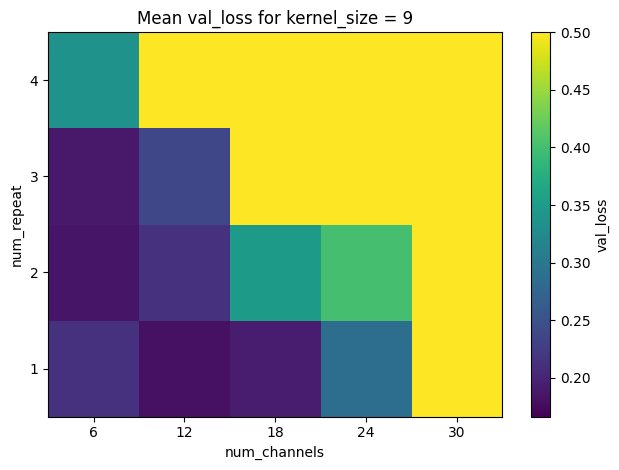

In [47]:
# Define the kernel sizes to plot
kernel_sizes = [1, 3, 5, 7, 9]

for k in kernel_sizes:
    # Filter and pivot
    dfk = df[df["kernel_size"] == k]
    pivot = dfk.pivot_table(
        index="num_repeat",
        columns="num_channels",
        values="val_loss",
        aggfunc="mean"
    )
    
    # Plot heatmap with a fixed color scale (0 to 1)
    plt.figure()
    plt.imshow(pivot.values, aspect='auto', origin='lower', vmin=min(df['val_loss']), vmax=0.5)
    plt.xlabel('num_channels')
    plt.ylabel('num_repeat')
    plt.title(f'Mean val_loss for kernel_size = {k}')
    plt.xticks(range(len(pivot.columns)), pivot.columns)
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.colorbar(label='val_loss')
    plt.tight_layout()
    plt.show()

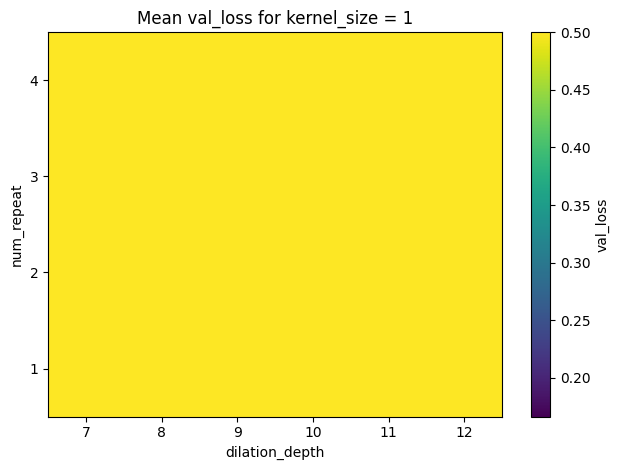

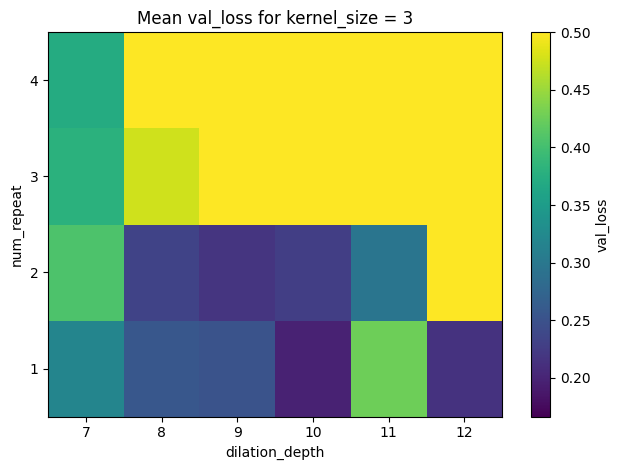

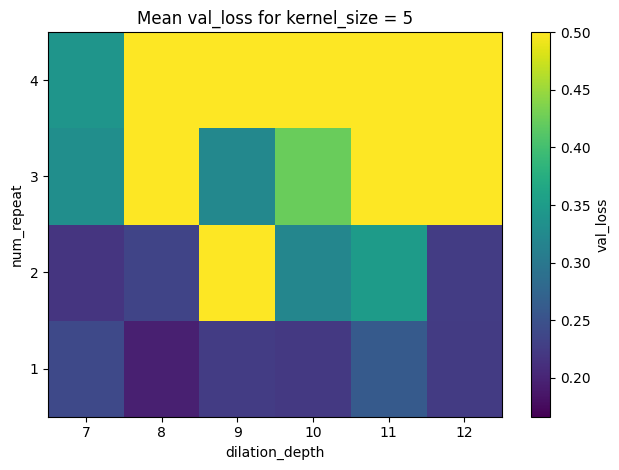

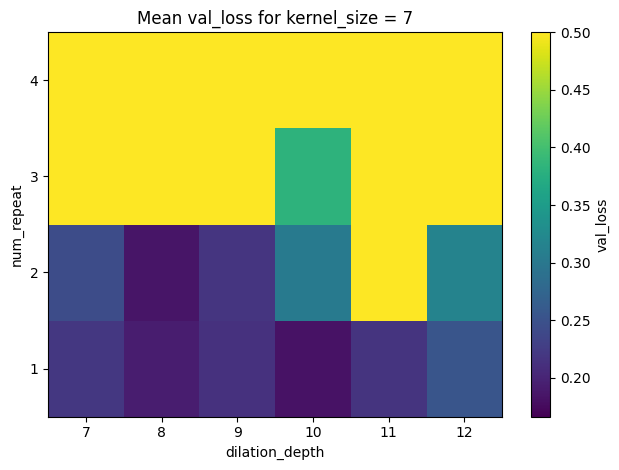

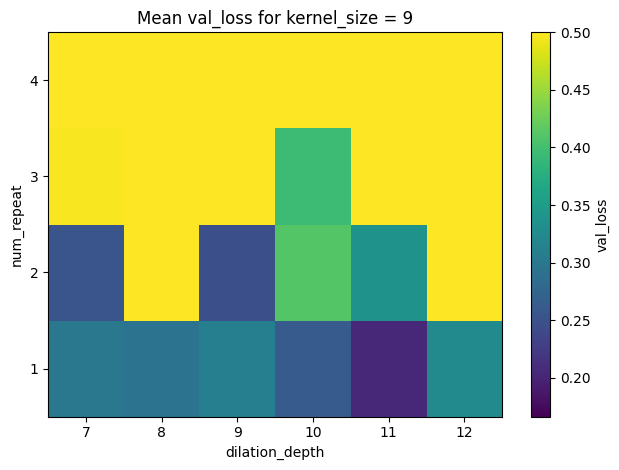

In [50]:
# Define the kernel sizes to plot
kernel_sizes = [1, 3, 5, 7, 9]

for k in kernel_sizes:
    # Filter and pivot
    dfk = df[df["kernel_size"] == k]
    pivot = dfk.pivot_table(
        index="num_repeat",
        columns="dilation_depth",
        values="val_loss",
        aggfunc="mean"
    )
    
    # Plot heatmap with a fixed color scale (0 to 1)
    plt.figure()
    plt.imshow(pivot.values, aspect='auto', origin='lower', vmin=min(df['val_loss']), vmax=0.5)
    plt.xlabel('dilation_depth')
    plt.ylabel('num_repeat')
    plt.title(f'Mean val_loss for kernel_size = {k}')
    plt.xticks(range(len(pivot.columns)), pivot.columns)
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.colorbar(label='val_loss')
    plt.tight_layout()
    plt.show()

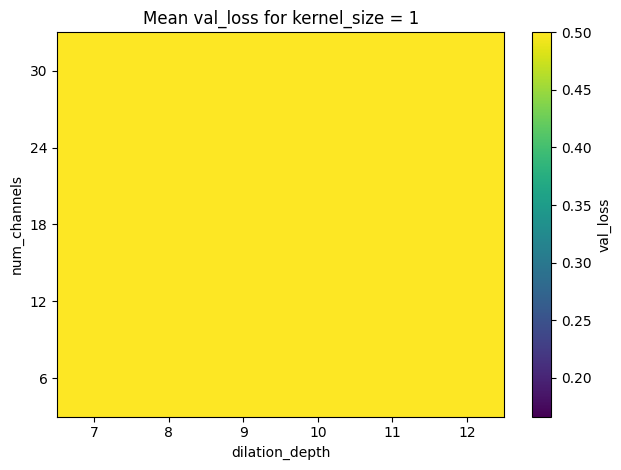

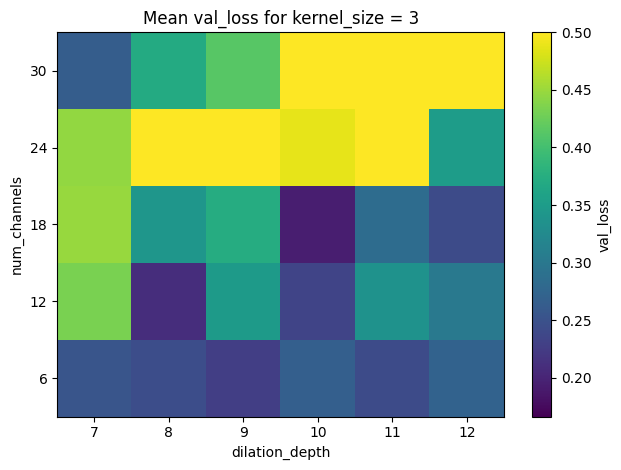

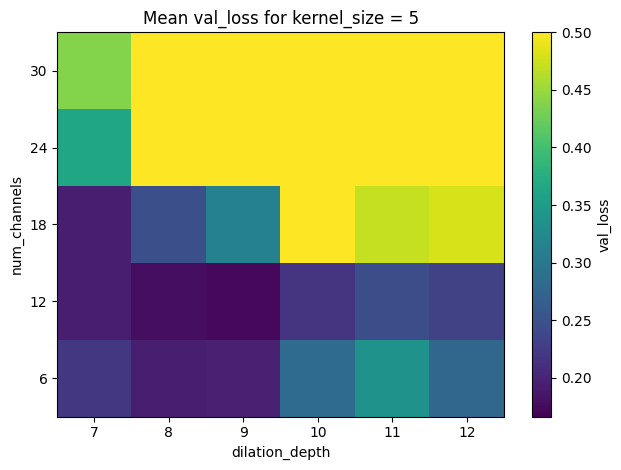

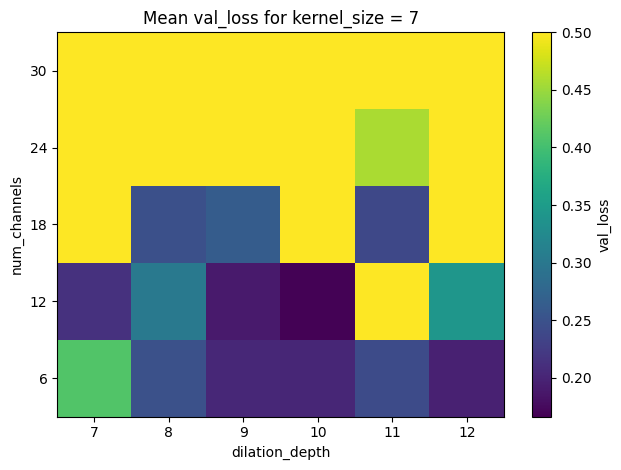

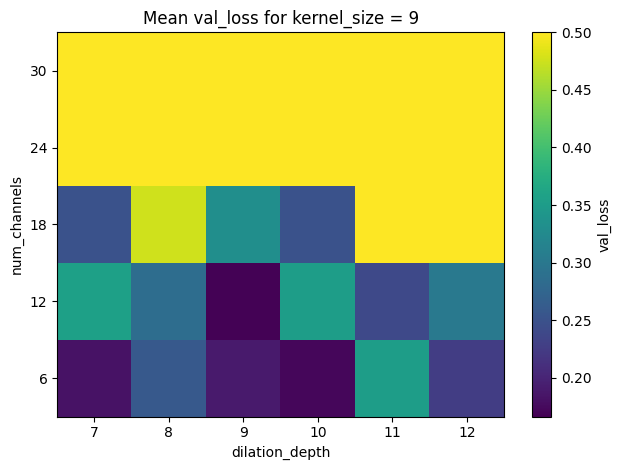

In [51]:
# Define the kernel sizes to plot
kernel_sizes = [1, 3, 5, 7, 9]

for k in kernel_sizes:
    # Filter and pivot
    dfk = df[df["kernel_size"] == k]
    pivot = dfk.pivot_table(
        index="num_channels",
        columns="dilation_depth",
        values="val_loss",
        aggfunc="mean"
    )
    
    # Plot heatmap with a fixed color scale (0 to 1)
    plt.figure()
    plt.imshow(pivot.values, aspect='auto', origin='lower', vmin=min(df['val_loss']), vmax=0.5)
    plt.xlabel('dilation_depth')
    plt.ylabel('num_channels')
    plt.title(f'Mean val_loss for kernel_size = {k}')
    plt.xticks(range(len(pivot.columns)), pivot.columns)
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.colorbar(label='val_loss')
    plt.tight_layout()
    plt.show()

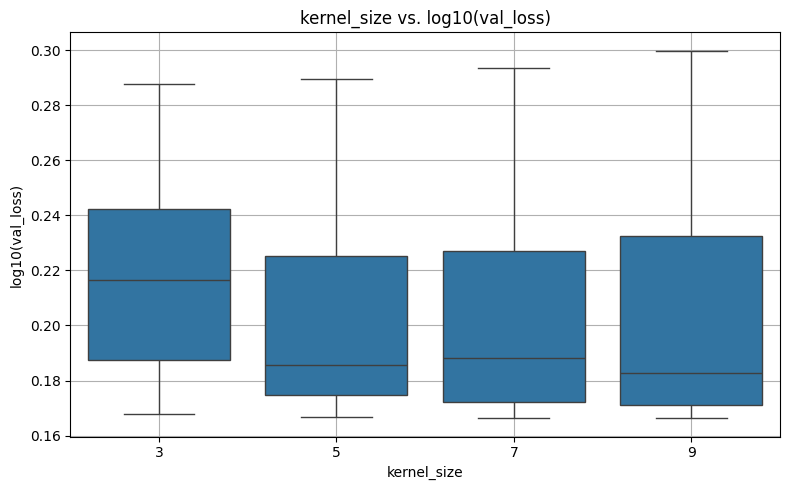

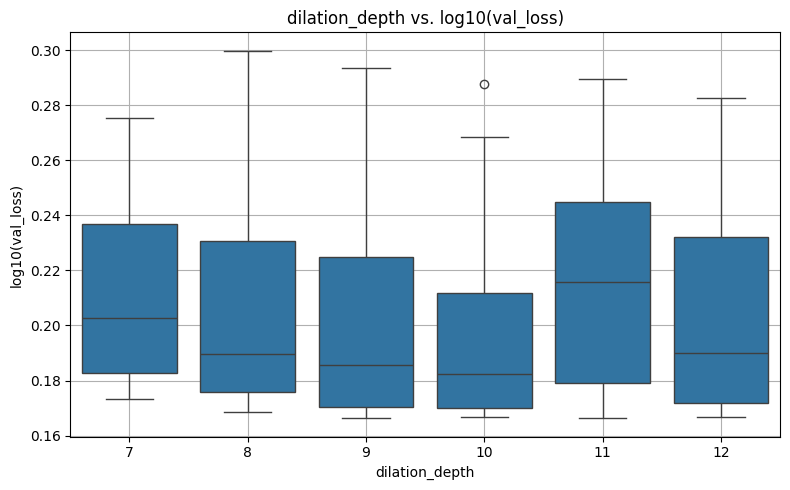

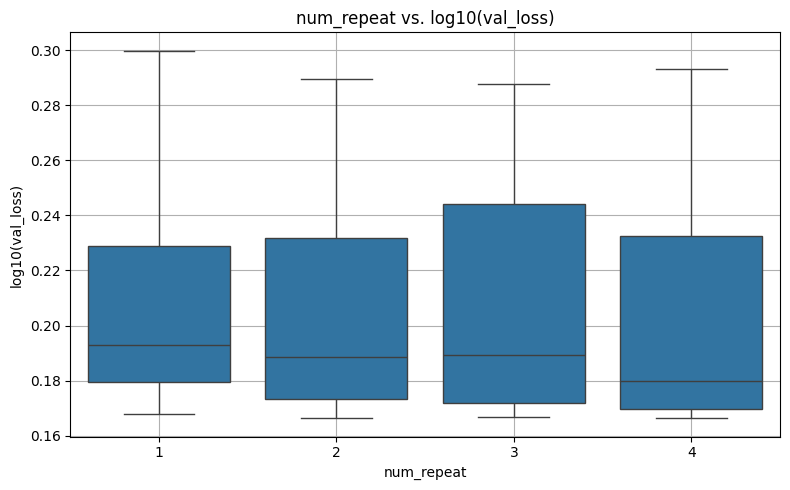

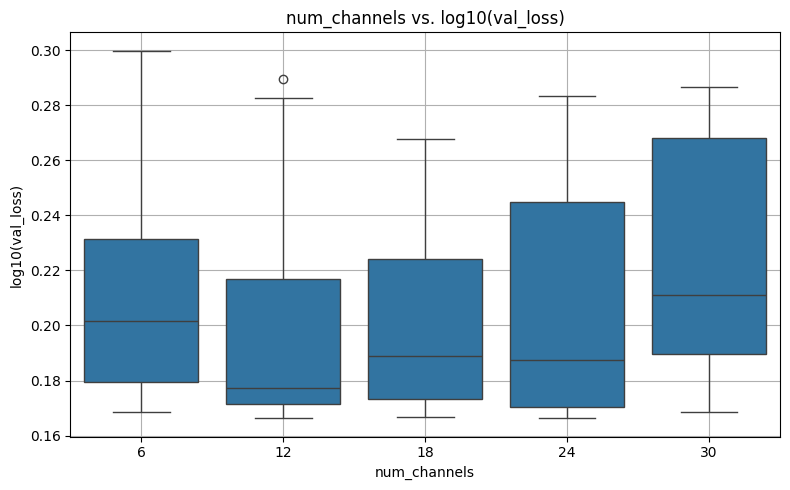

In [29]:
params = ['kernel_size', 'dilation_depth', 'num_repeat', 'num_channels']


df_fil = df[(df['kernel_size'] != 1) & (df['val_loss'] < 0.3)]

# Boxplots of val_loss by each hyperparameter
params = ['kernel_size', 'dilation_depth', 'num_repeat', 'num_channels']
for p in params:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_fil[p], y=df_fil['val_loss'])
    plt.title(f'{p} vs. log10(val_loss)')
    plt.xlabel(p)
    plt.ylabel('log10(val_loss)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

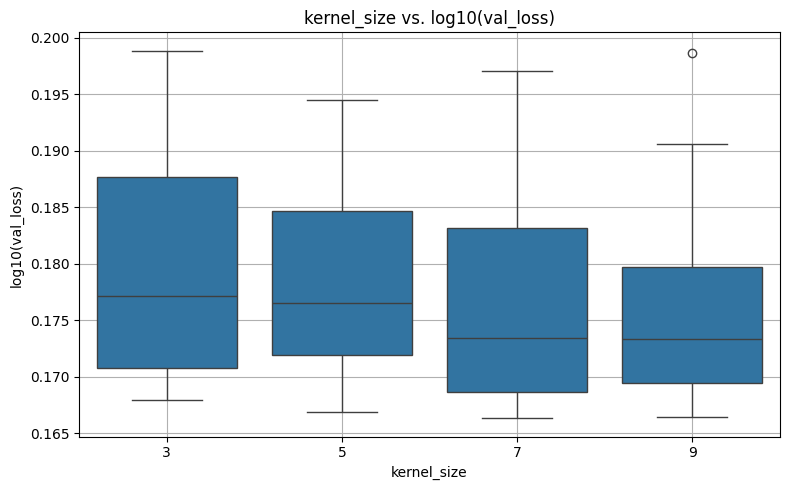

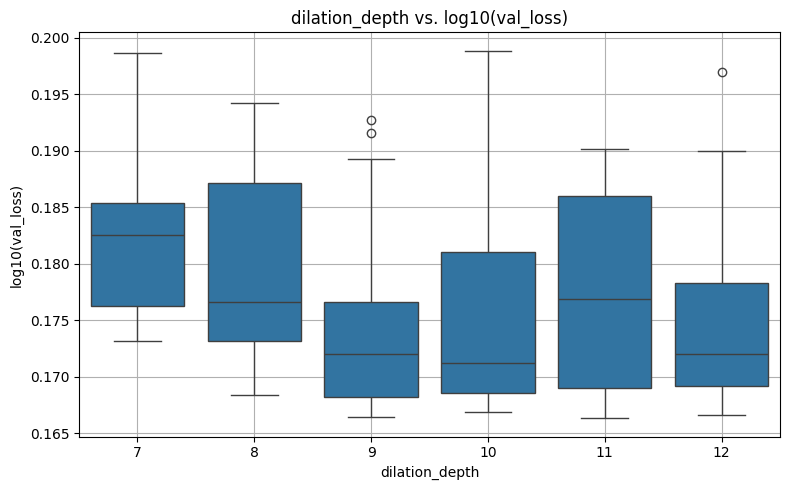

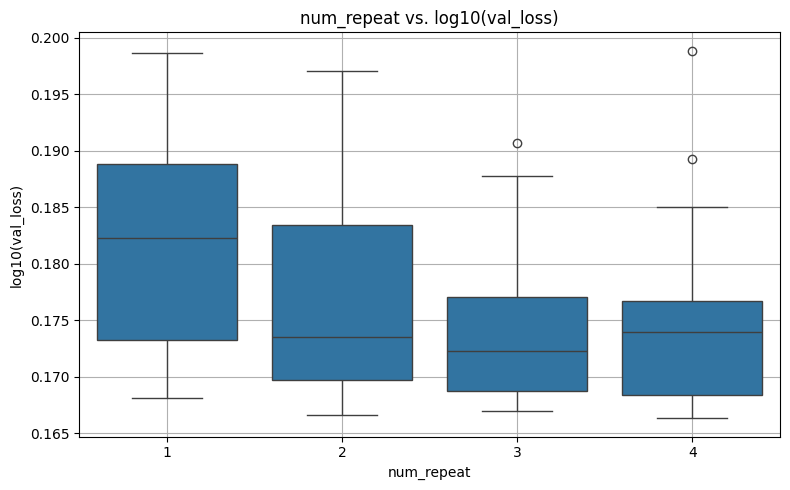

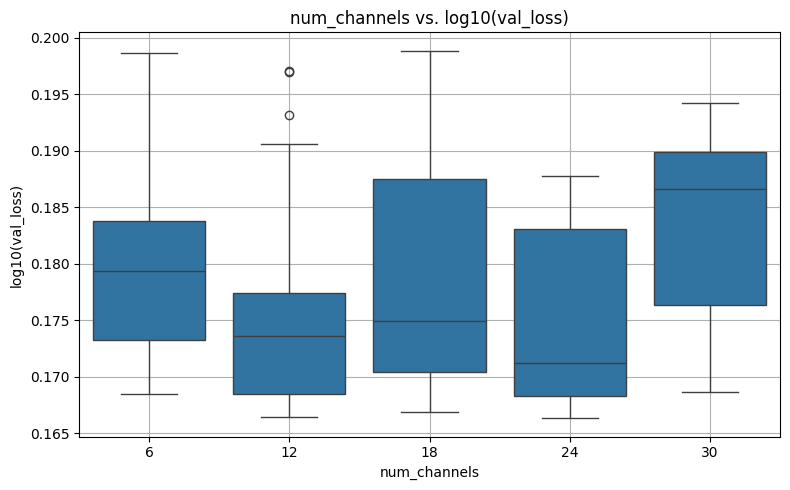

In [35]:
params = ['kernel_size', 'dilation_depth', 'num_repeat', 'num_channels']


df_fil = df[(df['kernel_size'] != 1) & (df['val_loss'] < 0.2)]

# Boxplots of val_loss by each hyperparameter
params = ['kernel_size', 'dilation_depth', 'num_repeat', 'num_channels']
for p in params:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=df_fil[p], y=df_fil['val_loss'])
    plt.title(f'{p} vs. log10(val_loss)')
    plt.xlabel(p)
    plt.ylabel('log10(val_loss)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

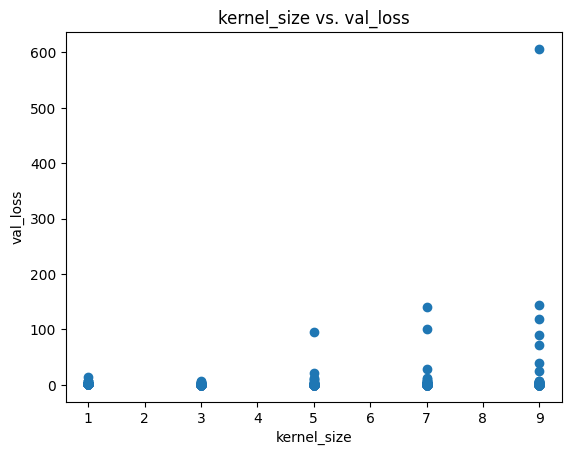

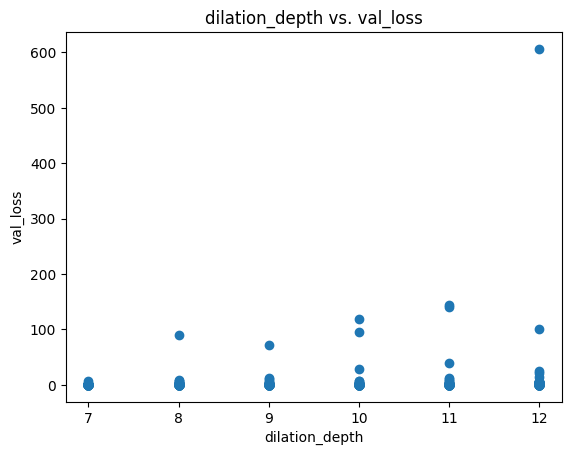

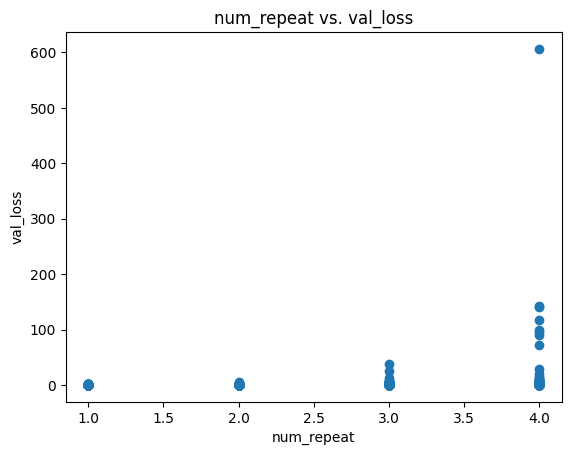

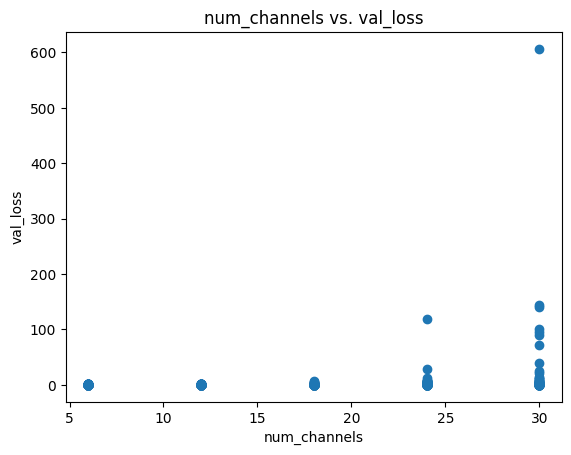

In [10]:
import matplotlib.pyplot as plt

params = ['kernel_size', 'dilation_depth', 'num_repeat', 'num_channels']
for p in params:
    plt.figure()
    plt.scatter(df[p], df['val_loss'])
    plt.title(f'{p} vs. val_loss')
    plt.xlabel(p)
    plt.ylabel('val_loss')
    plt.show()


In [15]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
    opencv-python (>=3.) ; extra == 'all'
                  ~~~~^


In [19]:
df[['kernel_size','dilation_depth','num_repeat','num_channels',"val_loss"]].to_excel('hyperparam_results.xlsx', index=False)

In [12]:
import numpy as np

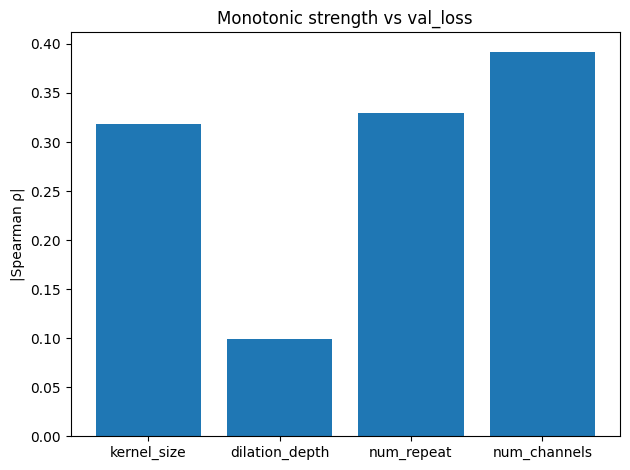

In [13]:
# Spearman correlations with val_loss
param_cols = ['kernel_size', 'dilation_depth', 'num_repeat', 'num_channels']
spearman_corr = df[param_cols + ['val_loss']].corr(method='spearman')['val_loss'].drop('val_loss')
spearman_df = spearman_corr.to_frame('spearman_corr').sort_values('spearman_corr', ascending=False)
# display_dataframe_to_user("Spearman correlation (monotonic) with val_loss", spearman_df)

# Bar plot of absolute correlations
plt.figure()
plt.bar(spearman_corr.index, np.abs(spearman_corr.values))
plt.ylabel('|Spearman ρ|')
plt.title('Monotonic strength vs val_loss')
plt.tight_layout()
plt.show()